# The different relationships

## 线性关系

$$
\vec {x} = [x_0, x_1, x_2, ..., x_n] \\
f(x) = \sum_{i \in N} w_i \times x_i + b
$$

# linear_regression_course

In [1]:
'''
Linear Regression:
Use boston house price dataset.
'''
import random
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml(name='boston', version=1, as_frame=True, return_X_y=False, parser='pandas')

In [3]:
dataset
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

In [4]:
dataframe = pd.DataFrame(data)
dataframe['price']  = target
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
dataframe.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

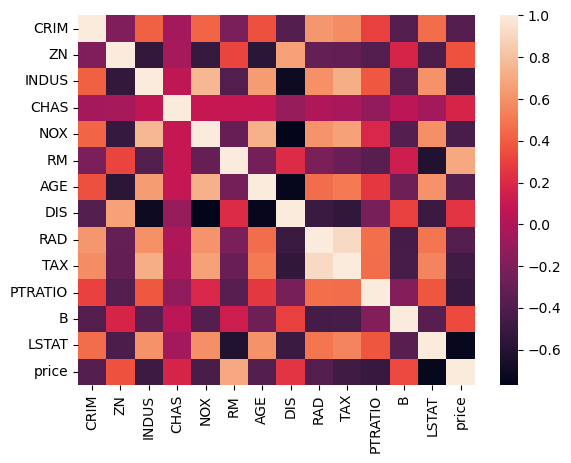

In [20]:
import seaborn as sns

sns.heatmap(dataframe.corr())

In [21]:
rm = dataframe['RM']
lstat = dataframe['LSTAT']
learning_rate = 1e-5

In [22]:
def linear(x, w, b):
    # vectorized model
    return np.dot(x, w.T) + b

In [23]:
def loss(yhat, y):
    # NumPy broadcast NumPy 广播方法
    return np.mean((yhat - y) ** 2)

In [24]:
def partial_w(x, y, yhat):
    return np.array([2 * np.mean((yhat - y) * x[0]), 2 * np.mean((yhat - y) * x[1])])

In [25]:
def partial_b(x, y, yhat):
    return 2 * np.mean((yhat - y))

In [26]:
w = np.random.random_sample(size = (1, 2))
b = np.random.random()

In [27]:
for i in range(200):
    for batch in range(len(rm)):
        # batch training
        index = random.choice(range(len(rm)))
        rm_x, lstat_x = rm[index], lstat[index]
        x = np.array([rm_x, lstat_x])
        y = target[index]

        yhat = linear(x, w, b)
        loss_ = loss(yhat, y)
        w = w + -1 * partial_w(x, y, yhat) * learning_rate
        b = b + -1 * partial_b(x, y, yhat) * learning_rate
        
        if batch % 100 == 0:
            print('Epoch: {} Batch: {}, loss: {}'.format(i, batch, loss_))

Epoch: 0 Batch: 0, loss: 201.9253694221943
Epoch: 0 Batch: 100, loss: 71.32244643616326
Epoch: 0 Batch: 200, loss: 151.30871715077416
Epoch: 0 Batch: 300, loss: 587.23260786917
Epoch: 0 Batch: 400, loss: 6.453910073381526
Epoch: 0 Batch: 500, loss: 116.23240453182525
Epoch: 1 Batch: 0, loss: 5.994050951088686
Epoch: 1 Batch: 100, loss: 95.07311412515928
Epoch: 1 Batch: 200, loss: 93.00279787931882
Epoch: 1 Batch: 300, loss: 12.791938458590993
Epoch: 1 Batch: 400, loss: 88.9973074156652
Epoch: 1 Batch: 500, loss: 383.5810812563498
Epoch: 2 Batch: 0, loss: 0.1337225825839616
Epoch: 2 Batch: 100, loss: 138.41875872116992
Epoch: 2 Batch: 200, loss: 68.5294537317563
Epoch: 2 Batch: 300, loss: 429.51323893721036
Epoch: 2 Batch: 400, loss: 33.26317927154253
Epoch: 2 Batch: 500, loss: 36.012201562441724
Epoch: 3 Batch: 0, loss: 12.492410878067583
Epoch: 3 Batch: 100, loss: 8.207398853024431
Epoch: 3 Batch: 200, loss: 132.8759995672897
Epoch: 3 Batch: 300, loss: 121.9546408817293
Epoch: 3 Batch

In [28]:
def optimize(w, b, x, y, yhat, pw, pb, learning_rate):
    w = w + -1 * pw(x, y, yhat) * learning_rate
    b = b + -1 * pb(x, y, yhat) * learning_rate

    return w, b

In [29]:
def train(model_to_be_train, target, loss, pw, pb):
    w = np.random.random_sample(size = (1, 2))# w normal
    b = np.random.random() # 0 深度学习时讲解
    learning_rate = 1e-5
    epoch = 200
    losses = []
    batch_size = 10

    for i in range(epoch):
        batch_loss = []
        for batch in range(len(rm) // batch_size):
            # batch trainning
            indices = random.choice(range(len(rm)))
            # index = random.choice(range(len(rm)))
            rm_x, lstat_x = rm[indices], lstat[indices]
            x = np.array([rm_x, lstat_x])
            y = target[indices]

            yhat = model_to_be_train(x, w, b)
            loss_v = loss(yhat, y)

            batch_loss.append(loss_v)

            w, b = optimize(w, b, x, y, yhat, pw, pb, learning_rate)

            if batch % 100 == 0:
                print('Epoch: {} Batch: {}, loss: {}'.format(i, batch, loss_v))

        losses.append(np.mean(batch_loss))

    return model_to_be_train, w, b, losses

Epoch: 0 Batch: 0, loss: 241.80824862851438
Epoch: 1 Batch: 0, loss: 302.96672990191433
Epoch: 2 Batch: 0, loss: 107.77234994610716
Epoch: 3 Batch: 0, loss: 194.712197489498
Epoch: 4 Batch: 0, loss: 46.01933500139437
Epoch: 5 Batch: 0, loss: 3.1238407862549735
Epoch: 6 Batch: 0, loss: 112.31998641512553
Epoch: 7 Batch: 0, loss: 8.660167004277735
Epoch: 8 Batch: 0, loss: 1294.4394262606436
Epoch: 9 Batch: 0, loss: 531.4850547954959
Epoch: 10 Batch: 0, loss: 25.803630275581753
Epoch: 11 Batch: 0, loss: 0.29930547617631464
Epoch: 12 Batch: 0, loss: 1354.5264807523943
Epoch: 13 Batch: 0, loss: 385.8179761062138
Epoch: 14 Batch: 0, loss: 4.075337155685153
Epoch: 15 Batch: 0, loss: 111.92527354160607
Epoch: 16 Batch: 0, loss: 20.805614201564477
Epoch: 17 Batch: 0, loss: 64.35399007171324
Epoch: 18 Batch: 0, loss: 79.09786965921573
Epoch: 19 Batch: 0, loss: 82.54147847619747
Epoch: 20 Batch: 0, loss: 0.6167813739813022
Epoch: 21 Batch: 0, loss: 69.66537618984258
Epoch: 22 Batch: 0, loss: 3.96

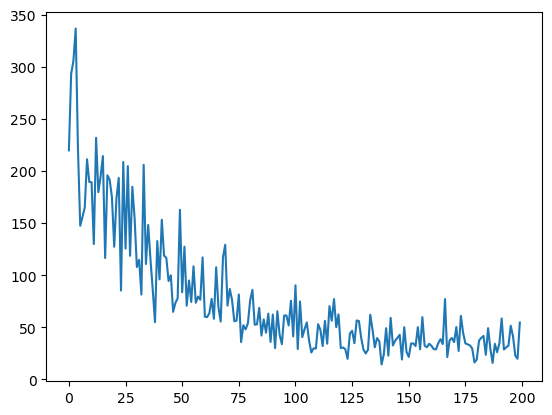

In [30]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
dataset = fetch_openml(name='boston', version=1, as_frame=True, return_X_y=False, parser='pandas')

data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']
dataframe = pd.DataFrame(data)
dataframe['price']  = target

rm = dataframe['RM']
lstat = dataframe['LSTAT']

model, w, b, losses = train(linear, target, loss, partial_w, partial_b)
plt.plot(losses)
predicate = model(np.array([19, 7]), w, b)
print(predicate)

plt.show()

![欢迎订阅：坍缩的奇点](../assets/Capture-2023-11-02-164446.png)